In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import tensorflow as tf

In [2]:
import os 
cwd = os.getcwd()
print('current path is :',cwd)
os.chdir('D:\Data') 
cwd1=os.getcwd()
print('new path is :',cwd1)


current path is : C:\Users\arzar
new path is : D:\Data


# Data Cleaning 

site_id        0
building_id    0
primary_use    0
square_feet    0
age            0
dtype: int64

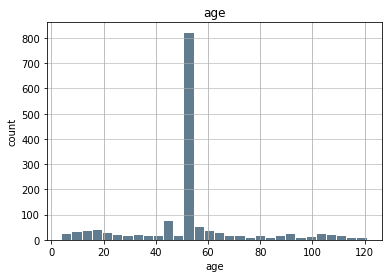

In [3]:
# Cleaning Building meta data
df_buildings=pd.read_csv('building_metadata.csv')
# Removing floor since majority is NA
df_buildings=df_buildings.drop('floor_count',axis=1)
# replacing the NaN in year built with mean of year
df_buildings['year_built'].fillna((df_buildings['year_built'].mean()), inplace=True)
# age of the building
df_buildings['age'] = 2021 - df_buildings['year_built']
df_buildings['age'] = df_buildings['age'].astype(int)
# removing year built
df_buildings=df_buildings.drop('year_built',axis=1)
# encoding building type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_buildings['primary_use'] = le.fit_transform(df_buildings['primary_use'])
# finishing off with checking the data NaN
# looking to see how the building age looking alike
df_buildings['age'].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')
plt.title('age')
plt.xlabel('age')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
#ensuring no Nan exist
df_buildings.isna().sum()

In [4]:
df_weather_test=pd.read_csv('weather_test.csv')
df_weather_test
df_weather_test.isna().sum()
df_weather_test

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


In [5]:
df_weather_train=pd.read_csv('weather_train.csv')
df_weather_train
df_weather_train.isna().sum()


#dropping features that are missinb mostly
df_weather_train=df_weather_train.drop(['cloud_coverage', 'precip_depth_1_hr','wind_direction','sea_level_pressure'], axis=1)

#replacing missing values with mean value
df_weather_train['air_temperature'].fillna((df_weather_train['air_temperature'].mean()), inplace=True)
df_weather_train['dew_temperature'].fillna((df_weather_train['dew_temperature'].mean()), inplace=True)
df_weather_train['wind_speed'].fillna((df_weather_train['wind_speed'].mean()), inplace=True)
#checking for outliers




D:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


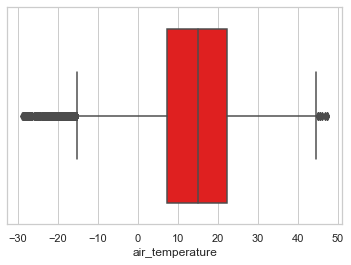

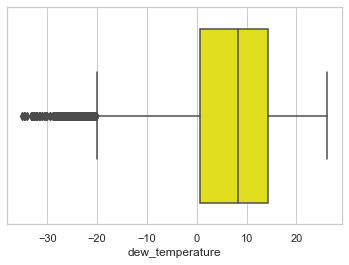

In [6]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df_weather_train['air_temperature'],color='red', orient='v')
plt.show()
sns.boxplot(x=df_weather_train['dew_temperature'], color='yellow')
plt.show()



In [7]:
df_weather_train.isna().sum()

site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

In [8]:
df_weather_train

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,25.0,20.0,0.0
1,0,2016-01-01 01:00:00,24.4,21.1,1.5
2,0,2016-01-01 02:00:00,22.8,21.1,0.0
3,0,2016-01-01 03:00:00,21.1,20.6,0.0
4,0,2016-01-01 04:00:00,20.0,20.0,2.6
...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,-8.0,5.7
139769,15,2016-12-31 20:00:00,2.8,-8.9,7.7
139770,15,2016-12-31 21:00:00,2.8,-7.2,5.1
139771,15,2016-12-31 22:00:00,2.2,-6.7,4.6


In [9]:
df_train=pd.read_csv('train.csv')

In [10]:
df_train=df_train.drop('meter',axis=1)

In [9]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [10]:
df_train = reduce_mem_usage(df_train, use_float16=True)

Memory usage of dataframe is 462.71 MB
Memory usage after optimization is: 154.56 MB
Decreased by 66.6%


In [11]:
database=df_train.merge(df_buildings, on='building_id', how='left')


In [12]:
df=database.merge(df_weather_train, on=['site_id','timestamp'], how='left')

In [13]:
df

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,0.000000,0,0,7432,13,25.0,20.0,0.0
1,1,2016-01-01 00:00:00,0.000000,0,0,2720,17,25.0,20.0,0.0
2,2,2016-01-01 00:00:00,0.000000,0,0,5376,30,25.0,20.0,0.0
3,3,2016-01-01 00:00:00,0.000000,0,0,23685,19,25.0,20.0,0.0
4,4,2016-01-01 00:00:00,0.000000,0,0,116607,46,25.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20216095,1444,2016-12-31 23:00:00,8.750000,15,1,19619,107,1.7,-5.6,8.8
20216096,1445,2016-12-31 23:00:00,4.825000,15,0,4298,53,1.7,-5.6,8.8
20216097,1446,2016-12-31 23:00:00,0.000000,15,1,11265,24,1.7,-5.6,8.8
20216098,1447,2016-12-31 23:00:00,159.574997,15,4,29775,20,1.7,-5.6,8.8


In [108]:
import datetime
from datetime import date, time

In [14]:
df['dates'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time


In [15]:
df=df.drop('timestamp',axis=1)
df

,building_id,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed,dates,time
0,0,0.000000,0,0,7432,13,25.0,20.0,0.0,2016-01-01,00:00:00
1,1,0.000000,0,0,2720,17,25.0,20.0,0.0,2016-01-01,00:00:00
2,2,0.000000,0,0,5376,30,25.0,20.0,0.0,2016-01-01,00:00:00
3,3,0.000000,0,0,23685,19,25.0,20.0,0.0,2016-01-01,00:00:00
4,4,0.000000,0,0,116607,46,25.0,20.0,0.0,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,8.750000,15,1,19619,107,1.7,-5.6,8.8,2016-12-31,23:00:00
20216096,1445,4.825000,15,0,4298,53,1.7,-5.6,8.8,2016-12-31,23:00:00
20216097,1446,0.000000,15,1,11265,24,1.7,-5.6,8.8,2016-12-31,23:00:00
20216098,1447,159.574997,15,4,29775,20,1.7,-5.6,8.8,2016-12-31,23:00:00


# Exploratory Analysis

D:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


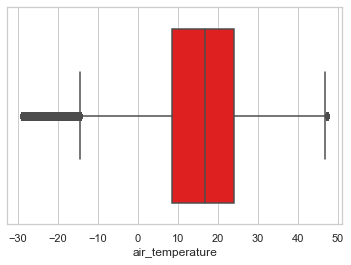

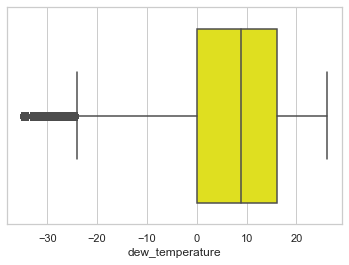

In [16]:
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['air_temperature'],color='red', orient='v')
plt.show()
sns.boxplot(x=df['dew_temperature'], color='yellow')
plt.show()

Text(0.5, 1.0, 'Meter vs Site ID')

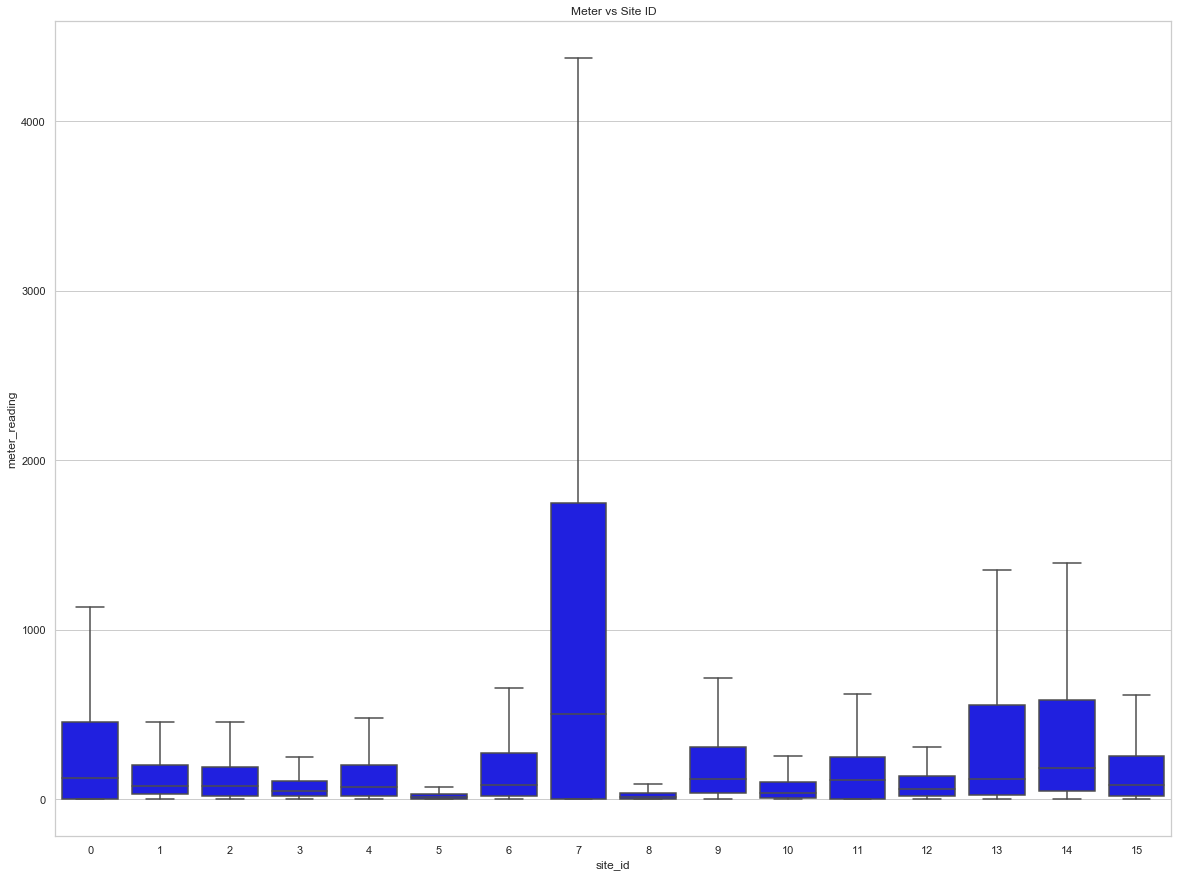

In [17]:
fig, axes = plt.subplots(1,1, figsize=(20, 15))
sns.boxplot(x='site_id', y='meter_reading', data=df,showfliers=False,color='blue').set_title('Meter vs Site ID')


I need to explore site 7, and examine the outliers 

In [86]:
zero

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed


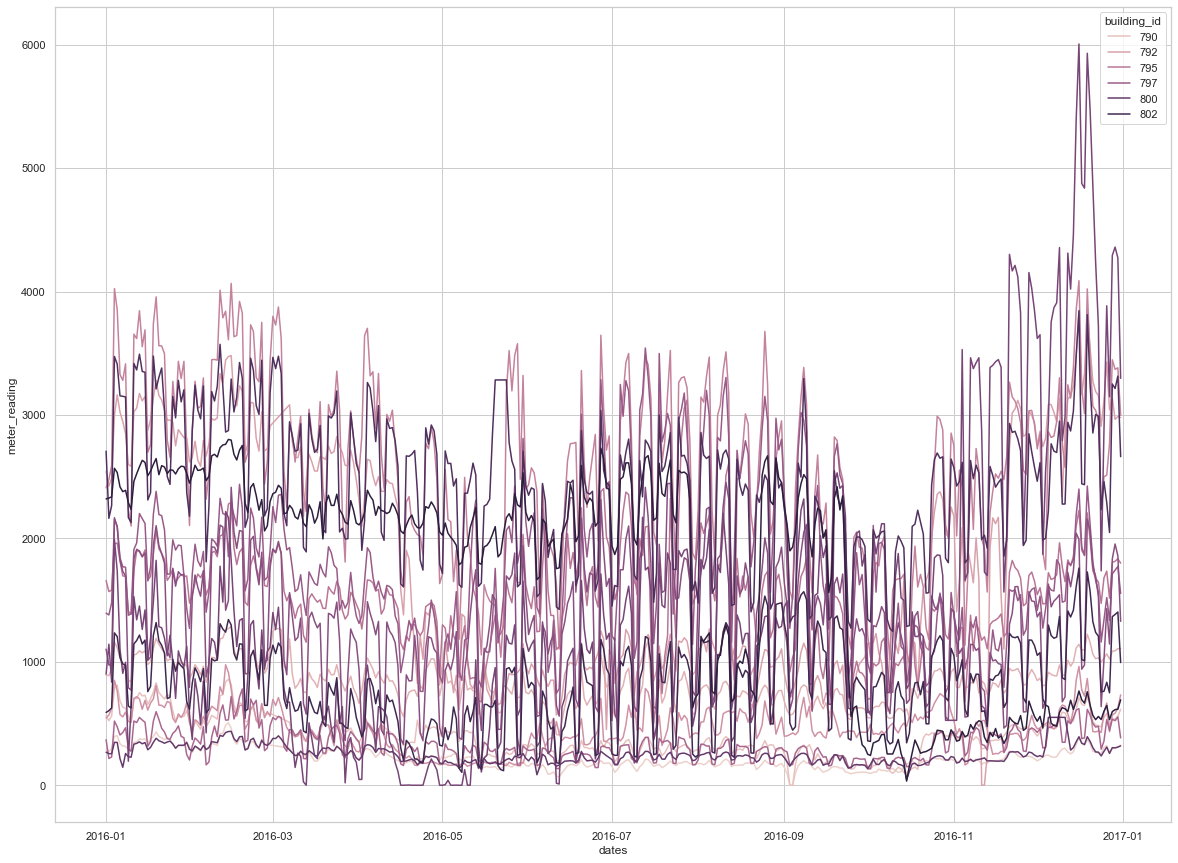

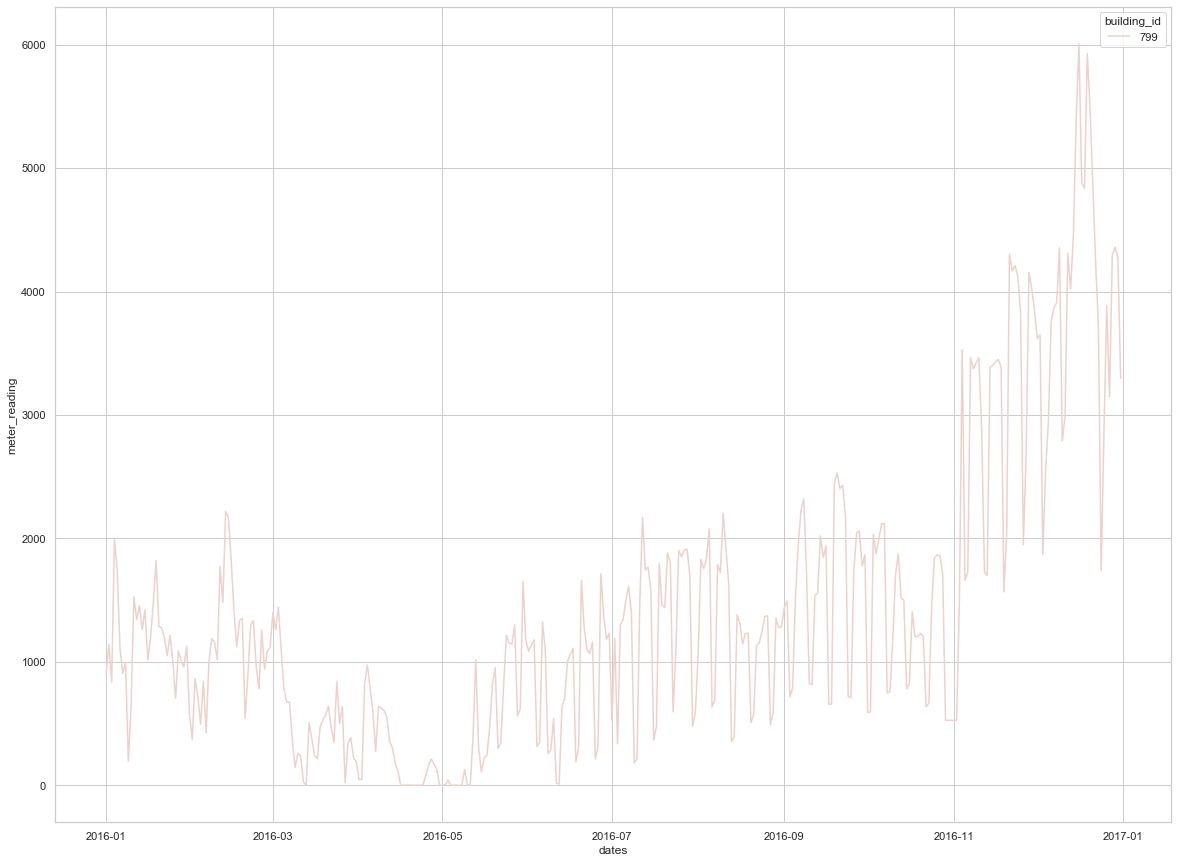

In [18]:
fig, axes = plt.subplots(1,1, figsize=(20, 15))

temp_df=df[['building_id','air_temperature','dates','meter_reading']][df['site_id']==7].groupby(['dates','building_id']).mean()
sns.set_palette('pastel')

sns.lineplot(data=temp_df,x='dates', y='meter_reading',hue='building_id', markers=True, dashes=False)
plt.show()



temp_df=df[['building_id','air_temperature','dates','meter_reading']][(df['building_id']==799) & 
                                                                     ( df['site_id']==7)].groupby(['dates','building_id']).mean()
fig, axes = plt.subplots(1,1, figsize=(20, 15))
sns.lineplot(data=temp_df,x='dates', y='meter_reading',hue='building_id', markers=True, dashes=False)
plt.show()

In [19]:
# now I remove the anomolies from building 800 in site_id =7 
df = df.drop(df[(df['meter_reading' ]> 4500) & (df['building_id']==799)].index)

In [20]:
df

,building_id,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed,dates,time
0,0,0.000000,0,0,7432,13,25.0,20.0,0.0,2016-01-01,00:00:00
1,1,0.000000,0,0,2720,17,25.0,20.0,0.0,2016-01-01,00:00:00
2,2,0.000000,0,0,5376,30,25.0,20.0,0.0,2016-01-01,00:00:00
3,3,0.000000,0,0,23685,19,25.0,20.0,0.0,2016-01-01,00:00:00
4,4,0.000000,0,0,116607,46,25.0,20.0,0.0,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,8.750000,15,1,19619,107,1.7,-5.6,8.8,2016-12-31,23:00:00
20216096,1445,4.825000,15,0,4298,53,1.7,-5.6,8.8,2016-12-31,23:00:00
20216097,1446,0.000000,15,1,11265,24,1.7,-5.6,8.8,2016-12-31,23:00:00
20216098,1447,159.574997,15,4,29775,20,1.7,-5.6,8.8,2016-12-31,23:00:00


In [291]:
df['meter_reading'].iloc[df['building_id']==1448]

SyntaxError: invalid syntax (<ipython-input-291-87450e5f3c19>, line 1)

In [34]:



df1=df.groupby(['dates','building_id']).mean()
df1.reset_index(level=0, inplace=True)
df1

,dates,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed
building_id,,,,,,,,,
0,2016-01-01,0.000000,0.0,0.0,7432.0,13.0,23.3375,20.020833,1.854167
1,2016-01-01,0.000000,0.0,0.0,2720.0,17.0,23.3375,20.020833,1.854167
2,2016-01-01,0.000000,0.0,0.0,5376.0,30.0,23.3375,20.020833,1.854167
3,2016-01-01,0.000000,0.0,0.0,23685.0,19.0,23.3375,20.020833,1.854167
4,2016-01-01,0.000000,0.0,0.0,116607.0,46.0,23.3375,20.020833,1.854167
...,...,...,...,...,...,...,...,...,...
1444,2016-12-31,7.382292,15.0,1.0,19619.0,107.0,-1.6500,-7.337500,5.570833
1445,2016-12-31,5.593750,15.0,0.0,4298.0,53.0,-1.6500,-7.337500,5.570833
1446,2016-12-31,1.318750,15.0,1.0,11265.0,24.0,-1.6500,-7.337500,5.570833


KeyboardInterrupt: 

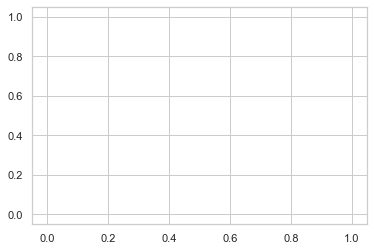

In [293]:
sns.lineplot(data=df1,x='square_feet', y='meter_reading',hue='building_id', markers=True, dashes=False)
plt.show()

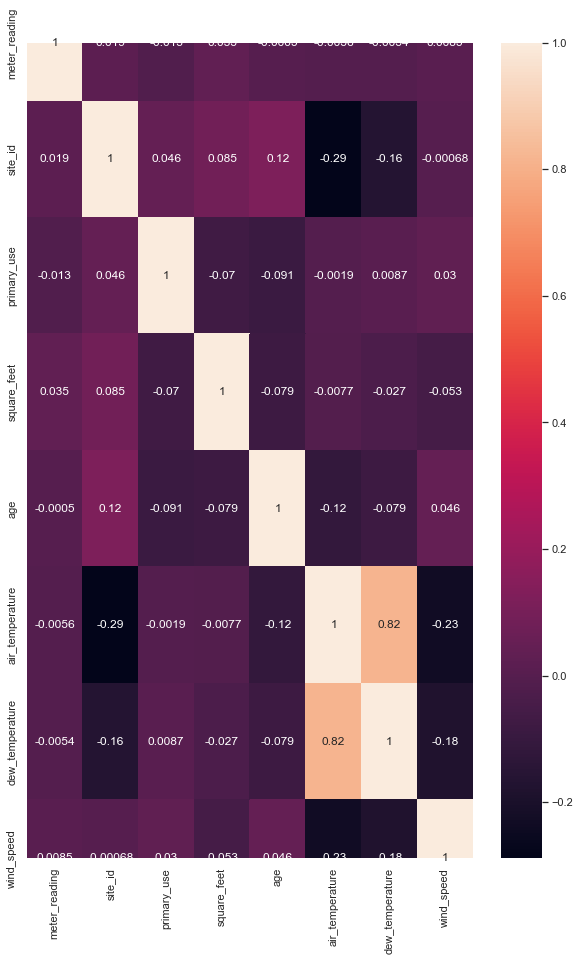

,meter_reading,site_id,primary_use,square_feet,age,air_temperature,dew_temperature,wind_speed
meter_reading,1.000000,0.019071,-0.013491,0.034767,-0.000497,-0.005617,-0.005354,0.008522
site_id,0.019071,1.000000,0.045855,0.085469,0.123196,-0.288509,-0.164517,-0.000679
primary_use,-0.013491,0.045855,1.000000,-0.069964,-0.091072,-0.001863,0.008670,0.030459
square_feet,0.034767,0.085469,-0.069964,1.000000,-0.078777,-0.007748,-0.027350,-0.053464
age,-0.000497,0.123196,-0.091072,-0.078777,1.000000,-0.117036,-0.079265,0.045979
air_temperature,-0.005617,-0.288509,-0.001863,-0.007748,-0.117036,1.000000,0.818355,-0.233131
dew_temperature,-0.005354,-0.164517,0.008670,-0.027350,-0.079265,0.818355,1.000000,-0.181845
wind_speed,0.008522,-0.000679,0.030459,-0.053464,0.045979,-0.233131,-0.181845,1.000000


In [35]:
g, axes = plt.subplots(1,1, figsize=(10, 15))
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

In [36]:
# considering the corrolation matrix, I just keep the air temperature and drop dew temperature

df1=df1.drop('dew_temperature',axis=1)


In [71]:
from datetime import date
d0 = date(2015, 12, 31)
df1['day']= (df1['dates']-d0).dt.days



In [73]:
df1=df1.drop('dates',axis=1)


In [249]:
df1=df1.drop('day',axis=1)

In [273]:
column_names=['site_id','primary_use','square_feet','age','air_temperature','wind_speed','meter_reading']

df1 = df1.reindex(columns=column_names)
df1.dropna( inplace=True)

df1.drop(df1[df1.meter_reading ==0].index, inplace=True)

In [ ]:
df1.isna().sum()

In [274]:
df1

,site_id,primary_use,square_feet,age,air_temperature,wind_speed,meter_reading
building_id,,,,,,,
105,1.0,0.0,50623.0,53.0,5.3875,4.470833,45.948624
106,1.0,0.0,5374.0,53.0,5.3875,4.470833,5.991796
107,1.0,0.0,97532.0,16.0,5.3875,4.470833,343.067719
108,1.0,0.0,81580.0,108.0,5.3875,4.470833,178.728271
109,1.0,0.0,56995.0,68.0,5.3875,4.470833,106.498375
...,...,...,...,...,...,...,...
1443,15.0,0.0,40311.0,108.0,-1.6500,5.570833,82.043747
1444,15.0,1.0,19619.0,107.0,-1.6500,5.570833,7.382292
1445,15.0,0.0,4298.0,53.0,-1.6500,5.570833,5.593750


In [243]:
type(df1['square_feet'])

pandas.core.series.Series

# Machine Learning Model

In [275]:
X=df1.iloc[:,0:6].values
y=df1.iloc[:,6].values

In [276]:
print(X)


[[ 1.00e+00  0.00e+00  5.06e+04  5.30e+01  5.39e+00  4.47e+00]
 [ 1.00e+00  0.00e+00  5.37e+03  5.30e+01  5.39e+00  4.47e+00]
 [ 1.00e+00  0.00e+00  9.75e+04  1.60e+01  5.39e+00  4.47e+00]
 ...
 [ 1.50e+01  0.00e+00  4.30e+03  5.30e+01 -1.65e+00  5.57e+00]
 [ 1.50e+01  4.00e+00  2.98e+04  2.00e+01 -1.65e+00  5.57e+00]
 [ 1.50e+01  6.00e+00  9.23e+04  2.00e+01 -1.65e+00  5.57e+00]]


In [277]:
print (y)

[ 45.95   5.99 343.07 ...   5.59 156.55   3.33]


In [222]:
del ann

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=0)

In [279]:
ann = tf.keras.models.Sequential()

In [280]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [281]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [282]:
ann.add(tf.keras.layers.Dense(units=1))

In [283]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [284]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
10433/10433 [==============================] - 10s 969us/step - loss: 11160347648.0000
Epoch 2/50
10433/10433 [==============================] - 10s 921us/step - loss: 11160736768.0000
Epoch 3/50
10433/10433 [==============================] - 10s 931us/step - loss: 11160169472.0000
Epoch 4/50
 6469/10433 [=================>............] - ETA: 3s - loss: 11848289280.0000

KeyboardInterrupt: 

In [203]:
del ann

In [183]:
df1.isna().sum()

day                0
site_id            0
primary_use        0
square_feet        0
age                0
air_temperature    1
wind_speed         1
meter_reading      0
dtype: int64

In [230]:
del ann

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=0)

In [286]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ -622.86    10.72]
 [ 5950.4    385.9 ]
 [-3241.74    19.33]
 ...
 [ 1251.11    94.68]
 [ 5458.49   120.85]
 [ 4474.64    45.35]]


In [288]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.001611010492524212